# [LAB 10] 5. 단일표본 T-Test (One Sample T-Test)
**가설검정은 마케팅에서 많이 쓰는 기법임!**
- : 하나의 모집단 평균(:변수 1개)이 이전보다 달라졌는지/같은지, 달라졌다면 커졌는지/작아졌는지를 통계적으로 알아보기 위해 사용하는 검정법
- 기존에 알려진 사실이 현재는 어케 변했는지 확인하는 방법.
- 단일표본 t-test: 정규성만 확인, 등분산성은 확인 불가
  - 등분산성은 두개 이상의 집단에서 확인가능

## #01. 준비작업

### 1. 패키지 참조:

In [1]:
from hossam import load_data

from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
from math import sqrt

# 가설검정용 패키지:
from scipy.stats import t, ttest_1samp, normaltest

### 2. 그래프 초기화:

In [2]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

## #02. 예제(1) - 강아지 체온 변화

`dog_temperature` 데이터는 강아지 25마리의 체온을 측정한 데이터이다. 과거의 자료에서 강아지의 평균 체온은 24.3알려져 있다.

이번에 조사한 데이터에서도 강아지의 평균 체온이 24.3이라고 해도
좋은지 알고 싶다.

주어진 데이터가 정규성을 충족하는지 확인한 후 정규성이 충족된다면 강아지의 평균 체온에 대한 가설검정을 수행하라. 

### 1. 데이터 가져오기:

In [3]:
origin = load_data('dog_temperature')

print("\n==== 데이터 크기 확인 ====")
print(f"데이터 셋 크기: {origin.shape}")
print(f"열 갯수: {origin.shape[1]}")
print(f"행 갯수: {origin.shape[0]}")

print("\n==== 타입 확인 ====")
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab10/dog_temperature.xlsx
[desc] 강아지 25마리의 체온을 측정한 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata

==== 데이터 크기 확인 ====
데이터 셋 크기: (25, 1)
열 갯수: 1
행 갯수: 25

==== 타입 확인 ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   체온      25 non-null     float64
dtypes: float64(1)
memory usage: 332.0 bytes
None


,체온
0,25.8
1,24.6
2,26.1
3,22.9
4,25.1


### 2. 신뢰구간 확인:

C:\Users\itwill\AppData\Local\Temp\ipykernel_13384\459646863.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.kdeplot(data=data, fill=False, alpha=0.5, palette='pastel')


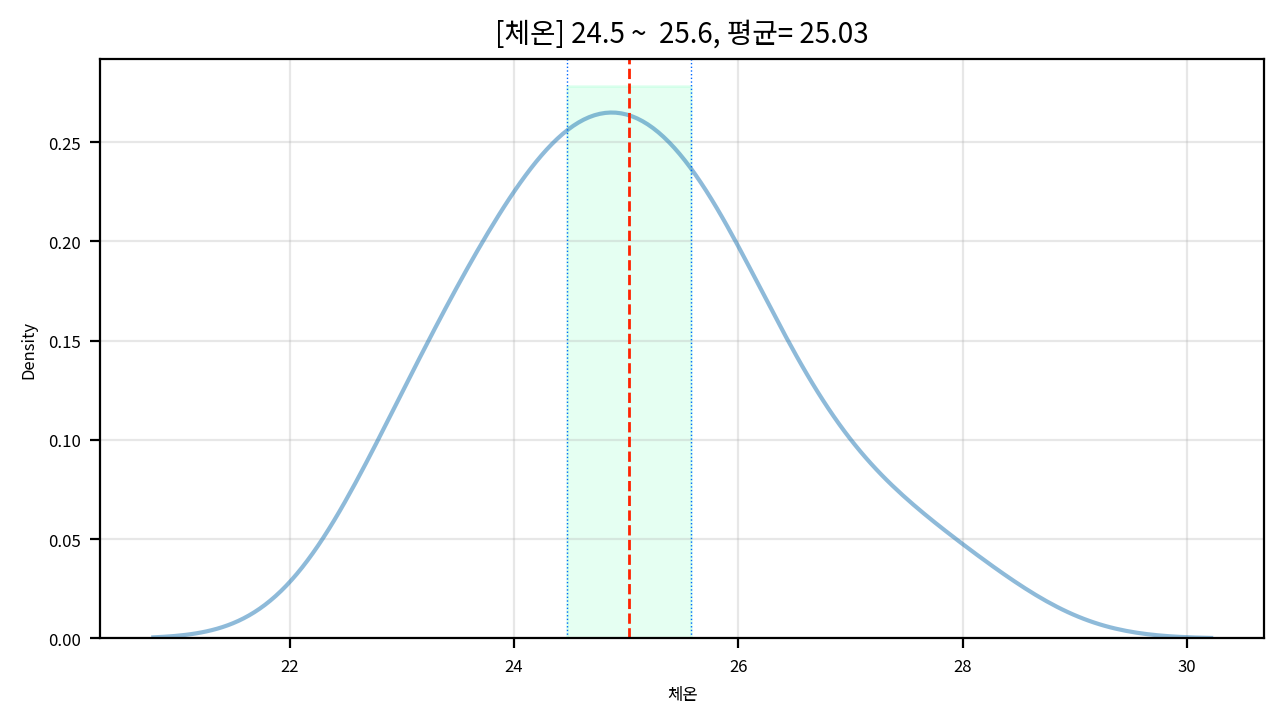

In [4]:
data = origin['체온']                   # 확인할 데이터 (컬럼단위)
max = data.max()                        # 최대값
dof = len(data) - 1                     # 자유도
clevel = 0.95                           # 신뢰수준
sp_mean = data.mean()                   # 표본평균
sp_std = data.std() # default: ddof=1   # 표본표준편차
sp_std_error = sp_std / sqrt(len(data)) # 표본표준오차

# 신뢰구간
cmin, cmax = t.interval(clevel, dof, loc = sp_mean, 
                        scale = sp_std_error)

# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) KDE plot 그리기:
sb.kdeplot(data=data, fill=False, alpha=0.5, palette='pastel')

# 2-1) 신뢰구간 범위 (cmin ~ cmax) 그리기:
ax.axvline(cmin, linestyle=":", color='#0066ff', linewidth=0.5)
ax.axvline(cmax, linestyle=":", color='#0066ff', linewidth=0.5)

# 2-2) 현재 축 범위 가져오기:
ymin, ymax = ax.get_ylim()
ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1, color='#00ff88')

# 2-3) 평균 표시:
ax.axvline(sp_mean, linestyle="--", color='#ff2200', linewidth=1)

# 3) 그래프 꾸미기: 
ax.set_title(f"[{data.name}] {cmin:.1f} ~ {cmax: .1f}, 평균={sp_mean: 0.2f}", fontsize = 10)
ax.grid(True, alpha=0.3)     # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

> 커널밀도함수 모양: 정규분포 형태임
> 
> 표본평균(25.03)이 신뢰구간 (24.5~25.6)에 포함됨

> 결론 -> 강아지 체온은 정상범위에 속함.

### 3. 데이터 정규성 검정:

In [6]:
s, p = normaltest(origin['체온'])
"statistic:{0:.3f}, p-value:{1:.3f}, 정규성충족여부:{2}".format(s, p, p>0.05)

'statistic:0.819, p-value:0.664, 정규성충족여부:True'

> 결론: p-value=0.664 -> p>0.05 충족했으니 정규성 따른다.

### 4. 강아지 평균 체온의 변화여부 확인

#### (1) T-검정 수행:

| 구분 | 수식 | 내용 |
| --- | --- | --- |
| 강아지 평균 체온 | μ |  |
| 귀무가설(Hο) | μ = 24.3 | 강아지 평균 체온이 24.3과 차이 없다 |
| 대립가설(H1) | μ ≠ 24.3 | 강아지 평균 체온이 24.3과 차이 있다 |

In [7]:
s, p = ttest_1samp(origin['체온'], 24.3)
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설 채택".format(s, p, '대립' if p<=0.05 else '귀무')

'statistic:2.713, p-value:0.012, 대립가설 채택'

#### (2) 결과 해석:

**statistic(T값, 검정 통계량):** 표본 데이터 이용해서 계산되는 값(주로 평균), p-값 구하기 위해 사용됨.

**P값(p-value):**
| 구분 | 설명 | 결론 |
| --- | --- | --- |
| P ≤ 0.01 | 귀무가설이 옳을 확률 ≤ 0.01 (개깐깐) | 대립가설 채택 |
| P ≤ 0.05 | 귀무가설이 옳을 확률 ≤ 0.05 (일반기준) | 대립가설 채택 |
| 0.05 < P ≤ 0.1 | 애매함 (샘플링 다시 한다) | 귀무가설 채택 |
| 0.1 ≤ P | 귀무가설 옳을 확률 ≥ 0.1 | 귀무가설 채택 |

**p-value 결과값의 의미:**
- T-검정에 대한 유의확률 출력이 0.012로, 통상적인 유의수준인 0.05보다 작게 나옴
  - 결론: '`유의수준 0.05`에서 `강아지 25마리의 체온`이 추출된 모집단의 평균인 24.3이라고 `할 수 없다`'

### 5. 평균 체온 변화가 2.43보다 작아졌는지 확인:

by: `alternative` 파라미터에서 `less` 설정

> `alternatine`: 대립가설을 지칭하는 파라미터임
>
>tip: 대립가설을 중심으로 생각하면 쉬움: 작아졌다는 가설을 대립가설로 설정, 파라미터 지정하면 됨

| 구분 | 수식 | 내용 |
| --- | --- | --- |
| 강아지 평균 체온 | μ |  |
| 귀무가설(Hο) | μ ≥ 24.3 | 강아지 평균 체온이 24.3보다 작지 않다 |
| 대립가설(H1) | μ < 24.3 | 강아지 평균 체온이 24.3보다 작다 |

In [9]:
s, p = ttest_1samp(origin['체온'], 24.3, alternative = 'less')
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설 채택".format(s, p, '대립' if p<=0.05 else '귀무')

'statistic:2.713, p-value:0.994, 귀무가설 채택'

> 해석: `p-value`가 `0.05`보다 크므로 귀무가설을 기각할 수 없음. 
> 
> 즉, 결론: 강아지 평균 체온은 `24.3`보다 작지 않다.

### 6. 평균 체온 변화가 2.43보다 커졌는지 확인:

> 관심사: 커졌는지 유무
> 
> -> 대립가설 (`alternative` 파라미터): 24.3보다 커졌다 -> `greater`

| 구분 | 수식 | 내용 |
| --- | --- | --- |
| 강아지 평균 체온 | μ |  |
| 귀무가설(Hο) | μ ≤ 24.3 | 강아지 평균 체온이 24.3보다 크지 않다 |
| 대립가설(H1) | μ > 24.3 | 강아지 평균 체온이 24.3보다 크다 |

In [10]:
s, p = ttest_1samp(origin['체온'], 24.3, alternative = 'greater')
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설 채택".format(s, p, '대립' if p<=0.05 else '귀무')

'statistic:2.713, p-value:0.006, 대립가설 채택'

> `p-value < 0.05` -> 귀무가설 기각, 대립가설 채택
>
> 즉, 결론: 강아지의 평균 체온이 24.3보다 커졌다.

## #02. 예제(2) - 생명보험 가입금액 평균 비교

- `insur` 데이터: 어느 보험회사에서 한해 동안 모집한 가입원들에 대한 가입 정보
- 이 회사에서 올해 실적을 가입원들의 평균 가입금액이 1억원인 것을 목표로 삼음
- 이 회사는 목표실적을 달성했다고 볼 수 있는지 검정하라.

### 1. 데이터 가져오기:

In [11]:
origin = load_data('insur')
origin.head()

[data] https://data.hossam.kr/data/lab10/insur.xlsx
[desc] 어느 보험회사에서 한해 동안 모집한 가입원들에 대한 가입 정보 (출처: 방송통신대학교 통계학개론)

field     description
--------  ------------------------------------------------------
직업      1=육체노동, 2=정신노동(직상인), 3=자영업
교육수준  1=초등학교 이하, 2=중졸 및 고졸, 3=대졸, 4=대학원 졸업
성별      1=남자, 2=여자
나이      숫자
가입금액  단위=천만원
월수입    단위=만원



,직업,교육수준,성별,나이,가입금액,월수입
0,1,2,1,35,15.0,100
1,2,3,1,40,10.0,150
2,2,3,2,36,8.0,120
3,3,4,2,38,12.0,140
4,1,1,1,45,10.0,150


### 2. 신뢰구간 확인:

C:\Users\itwill\AppData\Local\Temp\ipykernel_13384\1181649265.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.kdeplot(data=data, fill=False, alpha=0.5, palette='pastel')


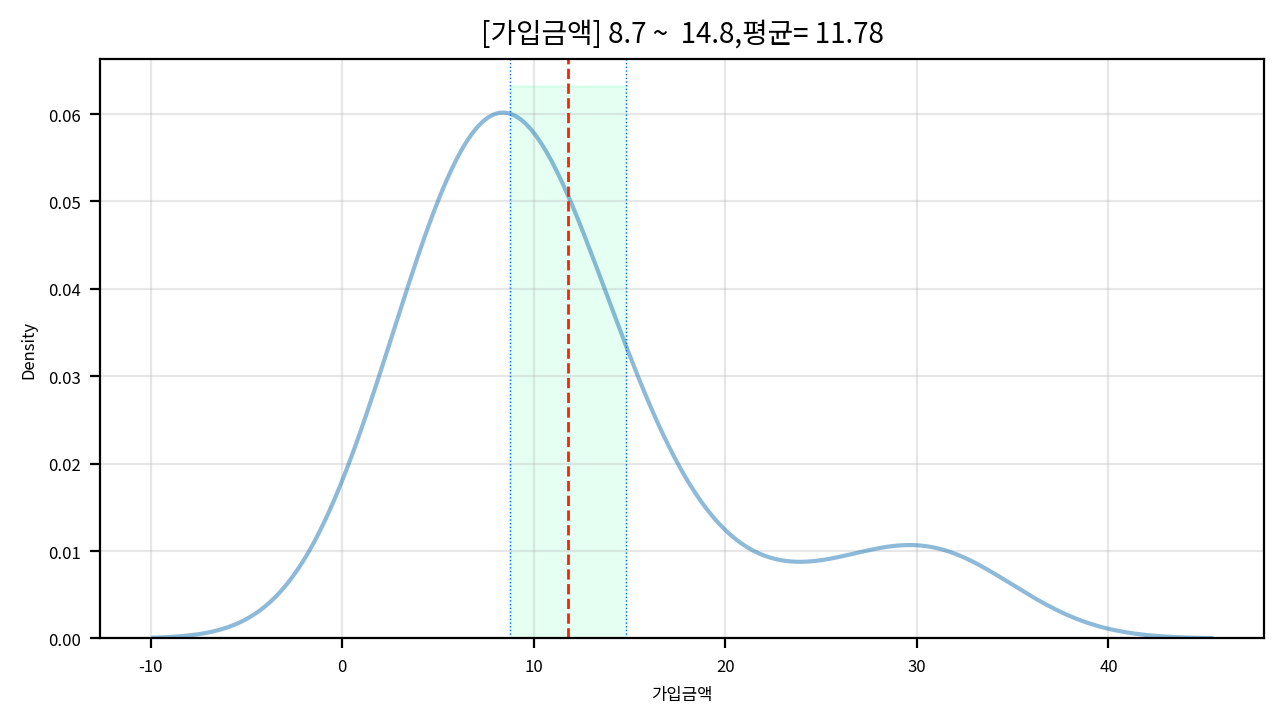

In [14]:
data = origin['가입금액']
max = data.max()
dof = len(data) - 1
clevel = 0.95
sp_mean = data.mean()
sp_std = data.std() # default: ddof=1
sp_std_error = sp_std / sqrt(len(data))

# 신뢰구간
cmin, cmax = t.interval(clevel, dof, loc = sp_mean, 
                        scale = sp_std_error)

# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) KDE plot 그리기:
sb.kdeplot(data=data, fill=False, alpha=0.5, palette='pastel')

# 2-1) 신뢰구간 범위 (cmin ~ cmax) 그리기:
ax.axvline(cmin, linestyle=":", color='#0066ff', linewidth=0.5)
ax.axvline(cmax, linestyle=":", color='#0066ff', linewidth=0.5)

# 2-2) 현재 축 범위 가져오기:
ymin, ymax = ax.get_ylim()
ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1, color='#00ff88')

# 2-3) 평균 표시:
ax.axvline(sp_mean, linestyle="--", color='#ff2200', linewidth=1)

# 3) 그래프 꾸미기: 
ax.set_title(f"[{data.name}] {cmin:.1f} ~ {cmax: .1f},평균={sp_mean: 0.2f}", fontsize = 10)
ax.grid(True, alpha=0.3)     # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

>표본평균(11.8)이 신뢰구간(8.7 ~ 14.8)에 포함되어 있으므로 가입금액의 데이터는 정상범위에 있다고 할 수 있지만, 커널 밀도 함수 그래프의 모양을 보았을 때 정규분포를 만족하지는 않고 있다.

### 3. 데이터 정규성 검정:

In [16]:
s, p = normaltest(origin['가입금액'])
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s,
p, p > 0.05)

'statistic: 11.438, p-value: 0.003, 정규성 충족 여부: False'

> 주어진 데이터는 p-value가 0.003이므로 (P > 0.05) 정규성을 충족하지 않는다. 이 경우 가설검정의 결과를 신뢰할 수 없다.

### 4. 데이터의 로그변환 (if 정규성 충족 못할 시)

데이터가 정규성을 충족 못하는 경우는 로그변환 스케일링으로 값의 단위를 축소시켜서 정규성을 조정할 수 있다 

#### (1) 로그변환 수행:

- 자연로그(`np.log`): 밑이 e(≒2.71)인 로그
- 상용로그(`np.log10`): 자연로그보다 값의 단위 더 강하게 축소시킴
- but 스케일링 측면에선 두 값중 뭘 택하더라도 통계 결과가 달라지진 않음

> -> 자연로그로 ㄱㄱ:

In [17]:
log_data = np.log(origin['가입금액'])
log_data

0     2.708050
1     2.302585
2     2.079442
3     2.484907
4     2.302585
5     0.916291
6     2.197225
7     2.014903
8     1.704748
9     3.218876
10    2.351375
11    1.252763
12    2.272126
13    2.525729
14    3.401197
15    2.397895
16    2.174752
17    1.504077
18    2.054124
19    1.902108
20    1.945910
21    3.496508
22    2.708050
23    2.995732
24    1.386294
25    1.609438
26    2.708050
27    3.401197
28    1.609438
29    2.302585
Name: 가입금액, dtype: float64

#### (2) 결과에 대한 정규성 검정:

In [18]:
s, p = normaltest(log_data)
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s,
p, p > 0.05)

'statistic: 0.104, p-value: 0.950, 정규성 충족 여부: True'

### 5. 가입금액의 평균이 1억원과 같은지 다른지 여부 확인:

| 구분 | 수식 | 내용 |
| --- | --- | --- |
| 가입금액의 평균 금액 | μ |  |
| 귀무가설(Hο) | μ = 1억 | 생명보험 가입금액의 평균은 1억과 차이 없다 |
| 대립가설(H1) | μ ≠ 1억 | 생명보험 가입금액의 평균은 1억과 차이 있다 |

In [21]:
# 목표금액: 1억원 (데이터 단위: 1천만원 -> 1억: 10)
target_value = np.log(10)

s, p = ttest_1samp(log_data, target_value)
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설 채택".format(s, p, '대립' if p<=0.05 else '귀무')

'statistic:-0.326, p-value:0.747, 귀무가설 채택'

> 단일 표본 검정에서 유의확률(0.747) > 유의수준(0.05) 
>
> -> 보험 가입금액의 모평균이 `1억원`이라는 귀무가설을 기걱할 수 없다!
> 
> 결론: 즉, 보험 가입금액의 평균은 1억원임.

### 6. 가입금액의 평균이 1억원보다 작은지 여부 확인:

| 구분 | 수식 | 내용 |
| --- | --- | --- |
| 귀무가설(Hο) | μ ≥ 1억 | 생명보험 가입금액의 평균은 1억보다 작지 않다 |
| 대립가설(H1) | μ < 1억 | 생명보험 가입금액의 평균은 1억보다 작다 |

In [24]:
s, p = ttest_1samp(log_data, target_value, alternative='less')
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설 채택".format(s, p, '대립' if p<=0.05 else '귀무')

'statistic:-0.326, p-value:0.374, 귀무가설 채택'

> 단일 표본 검정에서 유의확률(0.374) > 유의수준(0.05) 
>
> -> 보험 가입금액의 모평균이 `1억원`이라는 귀무가설을 기각할 수 없다!

### 7. 가입금액의 평균이 1억원보다 큰지 여부 확인:

| 구분 | 수식 | 내용 |
| --- | --- | --- |
| 귀무가설(Hο) | μ ≤ 1억 | 생명보험 가입금액의 평균은 1억보다 크지 않다 |
| 대립가설(H1) | μ > 1억 | 생명보험 가입금액의 평균은 1억보다 크다 |

In [25]:
s, p = ttest_1samp(log_data, target_value, alternative='greater')
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설 채택".format(s, p, '대립' if p<=0.05 else '귀무')

'statistic:-0.326, p-value:0.626, 귀무가설 채택'

> 단일 표본 검정에서 유의확률(0.626) > 유의수준(0.05) 
>
> -> 보험 가입금액의 모평균이 `1억원`이라는 귀무가설을 기각할 수 없다!
>
> 결론: 1억원임